<a href="https://colab.research.google.com/github/Falhebshi/Data-Mining/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Phase#2: Data Summarization and Preprocessing**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

#df = pd.read_csv('/garments_worker_productivity.csv')
df = pd.read_csv('Raw_data.csv')
df = pd.DataFrame(df)

# --- Make a copy of the raw dataset to keep it safe ---
Preprocessed_dataset = df.copy()

##**Part 1: Data Summarization**
say what we will do here.

Before We start our EDA, we first must ensure that our categorical data fields are consistent and don't contain inconsistencies that may interrupt our Exploratory Data Analysis.



In [3]:
for col in ['department', 'day', 'quarter']:
    print(f"\nOriginal values in {col}:")
    print(df[col].unique())


Original values in department:
['sweing' 'finishing ' 'finishing']

Original values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Original values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


We notice that the department column has two possible outcomes for the record 'finishing' ikely due to a human input error as well as an consistent misspelling of the word sewing. Therefore, its best we resolve this ahead of proceeding with our EDA to ensure clear and transparent insights collected.




In [4]:
# --- Correct department name typos ---
Preprocessed_dataset['department'] = Preprocessed_dataset['department'].replace({
    'sweing': 'sewing',
    'finishing ': 'finishing'
})


We will ensure here that the values have in fact been altered and saved to our preprocessed dataset

In [5]:
# --- Display unique cleaned values for key categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nCleaned values in {col}:")
    print(Preprocessed_dataset[col].unique())




Cleaned values in department:
['sewing' 'finishing']

Cleaned values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Cleaned values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


## Statistical Summaries
includes 5 number summary and mean , std, and count for each column

In [6]:
#5 number summmary
Preprocessed_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


## Missing Value Analysis

In [7]:
missing_counts = Preprocessed_dataset.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()


Missing values in each column:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64



This shows us that only the 'WIP' column has missing values that need to be handled.

## Outlier Analysis
we show the amount for each column and display a boxplot that shows it visually




In [8]:
outlier_summary = {}
# Select only numerical columns
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

for col in numeric_cols:
    Q1 = Preprocessed_dataset[col].quantile(0.25)
    Q3 = Preprocessed_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (Preprocessed_dataset[col] < lower) | (Preprocessed_dataset[col] > upper)
    outlier_count = mask.sum()
    outlier_summary[col] = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR, 'lower':lower, 'upper':upper, 'count':int(outlier_count)}
    print(f"\n{col}: {outlier_count} outliers")





targeted_productivity: 79 outliers

smv: 0 outliers

wip: 22 outliers

over_time: 1 outliers

incentive: 11 outliers

idle_time: 18 outliers

idle_men: 18 outliers

no_of_style_change: 147 outliers

no_of_workers: 0 outliers

actual_productivity: 54 outliers



#Boxplots
boxplots for each one indivdiuallly



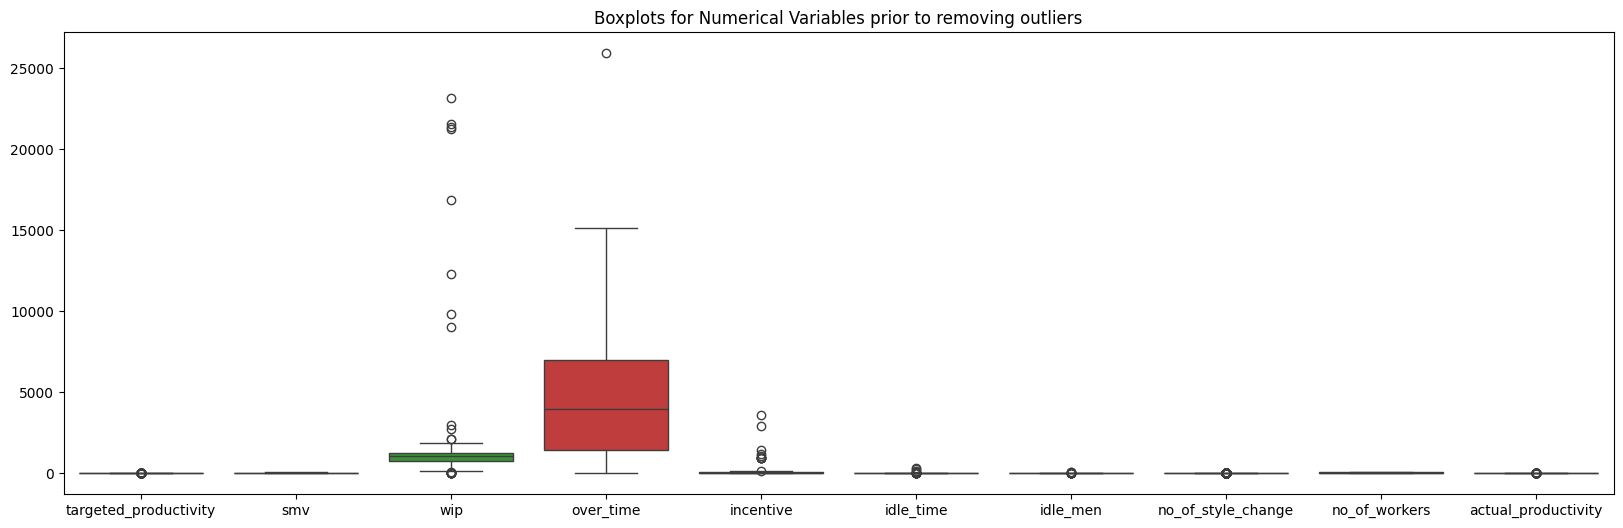

In [9]:
# Create boxplots for all features
plt.figure(figsize=(20, 6))
sns.boxplot(data=Preprocessed_dataset[numeric_cols])
plt.title('Boxplots for Numerical Variables prior to removing outliers')
plt.show()

#Selected Plots
-provide a clear description of the plot (what it contains)
-what information it provides you about the dataset(insights it gives)
-how this information helped you to decide that you need preprocessing (specify the preprocessing task it shows you need)

### 1. Targeted Productivity

Description of the plot:
The boxplot shows how the targeted productivity values are distributed for all teams, with most points concentrated around 0.75–0.8.

Information provided:
This reveals that nearly all teams are assigned similar productivity targets, suggesting consistency across departments.

Preprocessing implication:
Because the distribution is narrow and uniform, this feature does not require scaling or normalization but can be checked for missing or constant values.

### 2. SMV (Standard Minute Value)

Description of the plot:
The boxplot displays SMV values ranging from approximately 2.9 to 54.6, with a wide interquartile range and several high outliers.

Information provided:
This indicates that production tasks vary greatly in complexity and time requirements, as some jobs take significantly longer to complete.

Preprocessing implication:
The large spread and right-skewed distribution suggest the need for normalization or scaling to reduce skewness and prevent large SMV values from dominating the analysis.

###3. WIP (Work in Progress)

Description of the plot:
The boxplot reveals a wide range of WIP values, with a strong right skew and several large outliers.

Information provided:
Most teams maintain moderate WIP levels, but a few have abnormally high amounts of unfinished work, which could indicate process bottlenecks or inconsistent production flow.

Preprocessing implication:
Because of the high variability and extreme outliers, this column requires normalization and outlier treatment to prevent it from distorting model performance.

###4. Overtime

Description of the plot:
The boxplot shows a right-skewed distribution, where most teams record relatively low overtime, while several exhibit very high values above 7,000 minutes, including an extreme spike near 25,000 minutes.

Information provided:
This demonstrates that overtime levels vary widely between teams — while most work within normal limits, some accumulate substantially longer total hours.

Preprocessing implication:
The extreme upper values act as high-end outliers and should be handled with scaling or capping to prevent them from disproportionately affecting statistical and predictive models.

###5. Incentive

Description of the plot:
The boxplot shows that most incentive values are clustered around zero, with a few significantly higher outliers.

Information provided:
This means that most employees or teams receive little to no incentives, while a few receive very large bonuses, creating a heavily right-skewed distribution.

Preprocessing implication:
To prevent large incentive values from dominating, this feature requires outlier handling and possibly normalization to balance the scale.

###6. Idle Time

Description of the plot:
The boxplot indicates that most values are close to zero, but a few observations show noticeably higher idle times.

Information provided:
This suggests that while most teams operate efficiently with minimal downtime, certain instances reflect significant idle periods that deviate from the norm.

Preprocessing implication:
Due to the skewed distribution and outliers, this column should undergo outlier treatment and possibly log transformation to stabilize variance.

###7. Idle Men

Description of the plot:
The boxplot shows that most teams have zero or very few idle workers, while a small number of cases show a large idle workforce.

Information provided:
This highlights a similar trend to idle time — most production lines are fully utilized, but some experience exceptional inactivity.

Preprocessing implication:
Because of the sparse distribution and outliers, outlier removal or scaling is recommended to limit the influence of extreme idle counts.

###8. Number of Style Changes

Description of the plot:
The boxplot displays mostly low values (0–1) for the number of style changes, with a few much higher outliers.

Information provided:
This shows that most teams maintain stable production styles, while a few experience frequent changeovers that could affect consistency.

Preprocessing implication:
The right-skewed distribution suggests the need for outlier handling and normalization to standardize this feature before modeling.

###9. Number of Workers

Description of the plot:
The boxplot shows a wide range in the number of workers per team, with several points lying above the upper whisker as outliers.

Information provided:
This indicates variation in team sizes, with some production lines significantly larger than others.

Preprocessing implication:
To maintain balanced scaling across features, this variable should be scaled, and large outliers should be inspected or capped to ensure they don’t dominate the model.

###10. Actual Productivity

Description of the plot:
The boxplot shows that average productivity lies around 0.77, with a narrow interquartile range and some low outliers. The histogram reveals most values between 0.6 and 1.0, with fewer below 0.5.

Information provided:
This suggests that most teams achieve average or above-average productivity, but some underperform relative to the majority.

Preprocessing implication:
Because the data is slightly right-skewed with a few low extremes, this feature can benefit from discretization (e.g., grouping into low, medium, and high productivity categories) to support classification or performance analysis.

# Distribution of Numeric Features
Layout settings





In [ ]:
plots_per_row = 4        # how many histograms per row
rows = 3                 # total number of rows
total_plots = len(numeric_cols)
sns.set_style('whitegrid')

plt.figure(figsize=(plots_per_row * 3, rows * 2.5))  # compact and horizontal

for i, col in enumerate(numeric_cols[:plots_per_row * rows], 1):
    plt.subplot(rows, plots_per_row, i)
    sns.histplot(Preprocessed_dataset[col], kde=True, color='salmon', bins=25)
    plt.title(f'{col}', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features (Before Normalization)', fontsize=14, y=1.02)
plt.show()


1️⃣ What the plot shows:
The plots display the distribution of all numeric features in the dataset, each showing how values are spread across their respective ranges before any preprocessing. The KDE lines highlight the overall shape of each distribution.

2️⃣ What insights it provides:
Several features, such as wip, over_time, and incentive, exhibit strong right-skewness with extreme values on the higher end, while others like targeted_productivity and actual_productivity appear more concentrated around specific values. This shows variability in feature scales and unequal data spread across attributes.

3️⃣ What preprocessing step it indicates:
The differences in scale and skewness suggest the need for normalization or standardization to align feature ranges, as well as outlier treatment to handle the heavily skewed variables before model training.

## 1. Missing Values

wip    506
dtype: int64


/tmp/ipython-input-3596519284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='viridis')


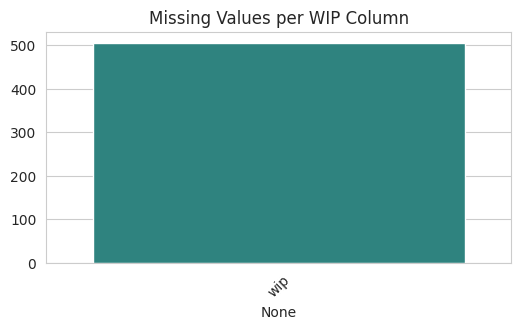

In [11]:
missing = Preprocessed_dataset.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(6,3))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.title('Missing Values per WIP Column')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3599435109.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')


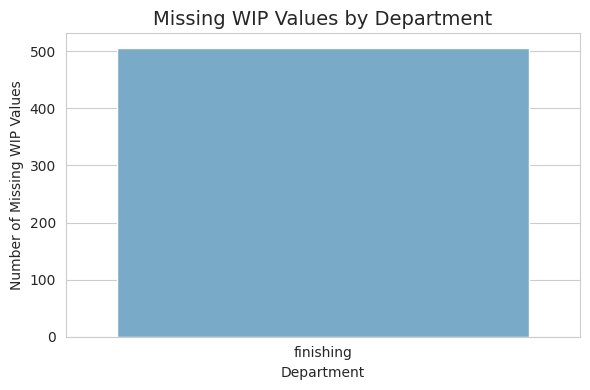

In [12]:
# Filter rows where WIP is missing
missing_wip = Preprocessed_dataset[Preprocessed_dataset['wip'].isnull()]

# Count missing WIP by department
missing_by_dept = missing_wip['department'].value_counts().reset_index()
missing_by_dept.columns = ['Department', 'Missing Count']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')
plt.title('Missing WIP Values by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Missing WIP Values')
plt.tight_layout()
plt.show()


1️⃣ What the plot shows:
The first bar plot displays the number of missing values for each column, revealing that only the WIP column contains missing data. The second plot breaks this down by department, showing that all missing WIP values occur in the Finishing department.

2️⃣ What insights it provides:
This indicates that missing WIP data is not random, but isolated to a specific department. This suggests a systematic issue in how WIP was recorded or measured for the Finishing department.

3️⃣ What preprocessing step it indicates:
Since the missing data is department-specific, it should be handled carefully — either by imputing values based on similar Finishing department records or by excluding those rows if imputation isn’t reliable.




---




##2. Noise Removal

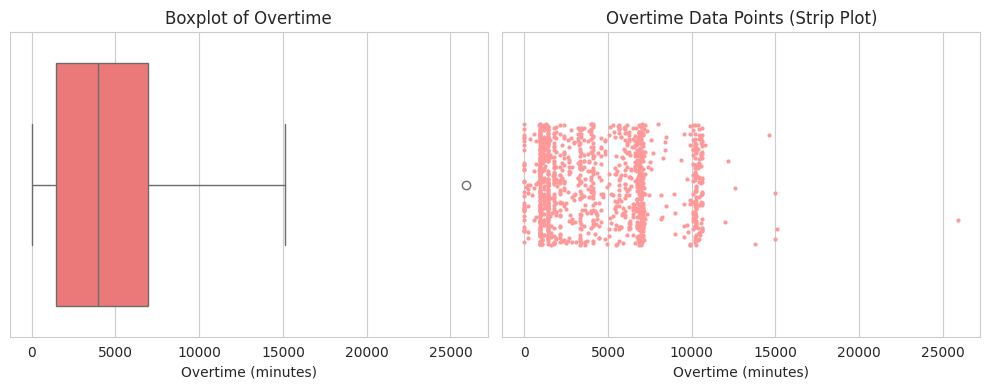

In [13]:
plt.figure(figsize=(10,4))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['over_time'], color='#ff6666')
plt.title('Boxplot of Overtime')
plt.xlabel('Overtime (minutes)')

# Strip Plot
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['over_time'], color='#ff9999', jitter=0.2, size=3)
plt.title('Overtime Data Points (Strip Plot)')
plt.xlabel('Overtime (minutes)')

plt.tight_layout()
plt.show()




1️⃣ What the plot shows: the boxplot and strip plot display the distribution of ***team overtime*** values and individual data points.

2️⃣ What insights it provides: most teams record low overtime, while a few show extremely high outliers far from the main cluster.

3️⃣ What preprocessing step it indicates: these outliers should be handled through **capping** to reduce noise and ensure balanced data.

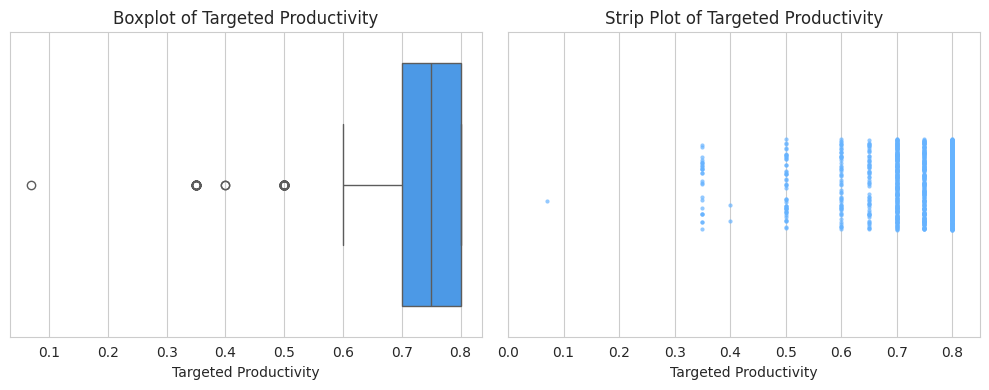

In [14]:

plt.figure(figsize=(10,4))

# Boxplot (left)
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['targeted_productivity'], color='#3399ff')
plt.title('Boxplot of Targeted Productivity')
plt.xlabel('Targeted Productivity')

# Strip Plot (right)
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['targeted_productivity'], color='#66b3ff', size=3, jitter=0.15, alpha=0.7)
plt.title('Strip Plot of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.xlim(0, 0.85)  # keeps focus on full range without squeezing



plt.tight_layout()
plt.show()


1️⃣ What the plot shows:
The boxplot and strip plot display the distribution of targeted productivity values for all teams. Most values are tightly clustered between 0.75 and 0.8, with a few noticeable outliers below 0.5, with a spike at under 0.1.

2️⃣ What insights it provides:
This indicates that target levels are generally consistent across teams, but a few records fall significantly below the usual range, showing slight variation in assigned targets.

3️⃣ What preprocessing step it indicates:
Since the data is mostly uniform with limited outliers, this feature requires only minor outlier handling before modeling.

##3. Descretization (for classification)

/tmp/ipython-input-1165928477.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


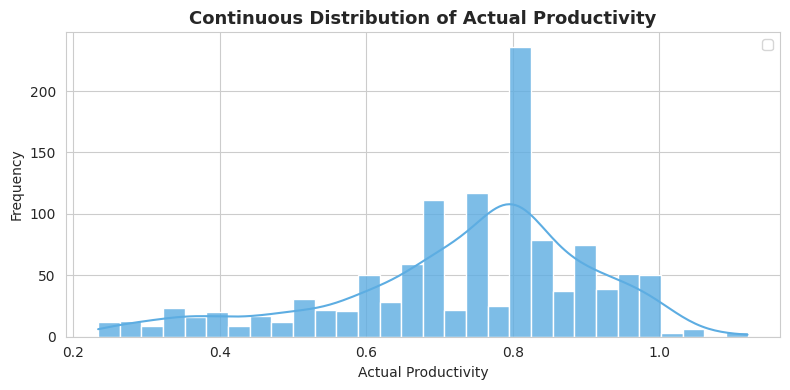

In [15]:
plt.figure(figsize=(8,4))

# Histogram + KDE
sns.histplot(Preprocessed_dataset['actual_productivity'], bins=30, kde=True, color='#5dade2', alpha=0.8)



# Titles and labels
plt.title('Continuous Distribution of Actual Productivity', fontsize=13, fontweight='bold')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



The plot shows the continuous distribution of the actual_productivity column.
It contains the frequency of productivity values for all records in the dataset.
Most values are around 0.7 to 0.9, which means that most workers perform close to the target productivity level.

This plot gives information about how the productivity values are spread and shows that the data is continuous, not categorical.
It also helps us notice that the distribution is not perfectly balanced — some values are much lower or higher than others.

From this, we can see that a preprocessing task is needed — specifically discretization (for classification).
We will convert the continuous actual_productivity values into ranges or categories (such as low, medium, and high) so they can be used in classification models later.

##4. Encoding

/tmp/ipython-input-3538040268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Preprocessed_dataset[col], palette='Set2')


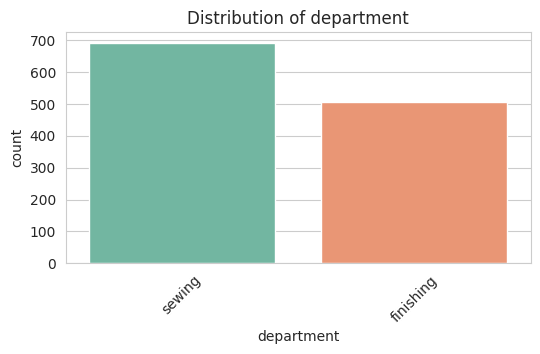

/tmp/ipython-input-3538040268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Preprocessed_dataset[col], palette='Set2')


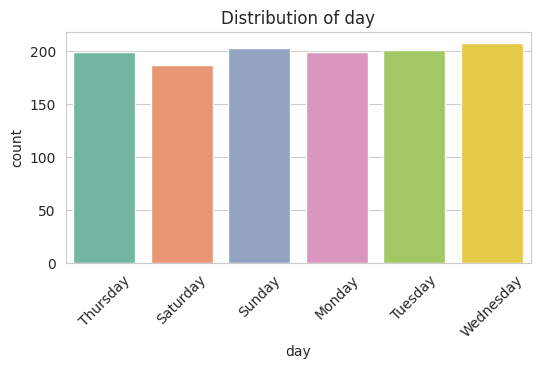

/tmp/ipython-input-3538040268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Preprocessed_dataset[col], palette='Set2')


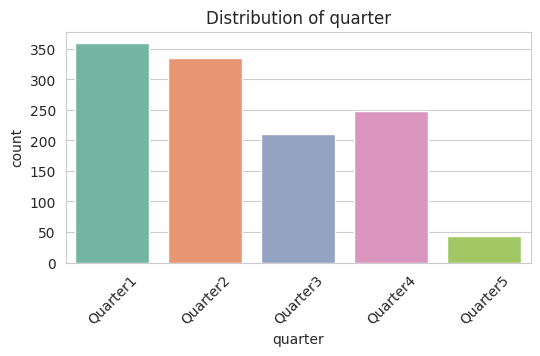

In [16]:
categorical_cols = Preprocessed_dataset.select_dtypes(exclude=np.number).columns

for col in ['department', 'day', 'quarter']:
    plt.figure(figsize=(6,3))
    sns.countplot(x=Preprocessed_dataset[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


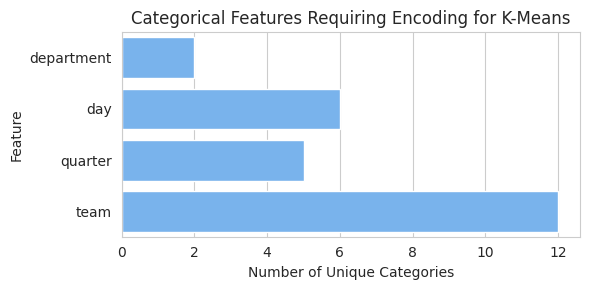

In [17]:

# Identify categorical columns
categorical_cols = ['department', 'day', 'quarter', 'team']

plt.figure(figsize=(6,3))
sns.barplot(x=[Preprocessed_dataset[col].nunique() for col in categorical_cols],
            y=categorical_cols,
            color='#66b3ff')
plt.title('Categorical Features Requiring Encoding for K-Means', fontsize=12)
plt.xlabel('Number of Unique Categories')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##5. Normalization (for clustering)

/tmp/ipython-input-2899069357.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')


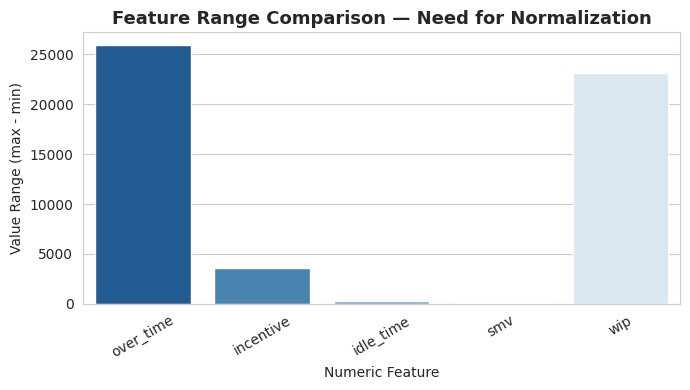

In [18]:

# Select numeric columns relevant for K-Means
numeric_cols = ['over_time', 'incentive', 'idle_time', 'smv', 'wip']

# Compute ranges (max - min)
ranges = Preprocessed_dataset[numeric_cols].max() - Preprocessed_dataset[numeric_cols].min()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')
plt.title('Feature Range Comparison — Need for Normalization', fontsize=13, fontweight='bold')
plt.xlabel('Numeric Feature')
plt.ylabel('Value Range (max - min)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



The plot shows the value ranges (max - min) of numeric features such as over_time, incentive, idle_time, smv, and wip.
It helps compare how wide each feature’s values are.

From the plot, we can see that some features like over_time and wip have very large ranges, while others like incentive have much smaller ranges.
This means that the features are not on the same scale.

This information shows that a preprocessing task is needed — specifically normalization.
Normalization will make all numeric features have similar scales, which is important for clustering algorithms (like K-Means) so that no feature dominates the others.

##variable distributions with respect to class label

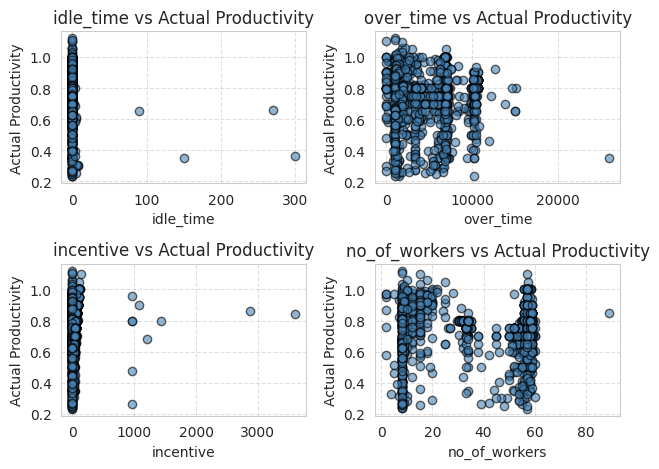

In [19]:
factors = ['idle_time', 'over_time', 'incentive', 'no_of_workers']

for i, factor in enumerate(factors, 1):
    plt.subplot(2,2,i)
    plt.scatter(Preprocessed_dataset[factor], Preprocessed_dataset['actual_productivity'], alpha=0.6, color='steelblue', edgecolor='k')
    plt.title(f"{factor} vs Actual Productivity")
    plt.xlabel(factor)
    plt.ylabel("Actual Productivity")
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

1. idle_time vs Actual Productivity
The plot shows the relationship between idle_time and actual_productivity.
It contains points that represent each team’s idle time and their productivity level.
From the plot, we can see that as idle time increases, productivity decreases — most productive teams have very low idle time.
This insight shows that the data may contain large value differences, so normalization is needed before modeling to keep all features on a similar scale.

⸻

2. over_time vs Actual Productivity
The plot shows how over_time affects actual_productivity.
The points are spread unevenly, and there is no clear linear relationship between overtime and productivity.
Some teams work long overtime hours without a big productivity increase.
This suggests the data has wide ranges and different scales, so normalization is required to avoid bias when using clustering or regression models.

⸻

3. incentive vs Actual Productivity
The plot shows the link between incentive and actual_productivity.
It contains points mostly at low incentive values with varying productivity levels.
The lack of a strong pattern indicates that incentive data may have uneven value ranges and needs to be scaled (normalized) to ensure fair feature comparison during modeling.

⸻

4. no_of_workers vs Actual Productivity
This plot shows the relationship between no_of_workers and actual_productivity.
It shows that teams with a moderate number of workers tend to have higher productivity, while very small or large teams show lower productivity.
The variation in worker counts compared to productivity indicates the need for normalization, so that this feature does not dominate others with smaller numeric ranges.

#2. Preprocessing

##Noise Removal




In [20]:
# --- 1. Make a copy of the raw dataset to keep it safe ---
# Preprocessed_dataset = df.copy() ---> Done in first cell

# --- 2. Check minimum value before cleaning ---
min_before = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity before cleaning: {min_before}")

# --- 3. Remove unrealistic or noisy values (below 0.1) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['targeted_productivity'] >= 0.1].reset_index(drop=True)

# --- 4. Check minimum value after cleaning ---
min_after = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity after cleaning: {min_after}")

# --- 5. Optional summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\n✅ Noise removal complete. {removed_count} data point(s) removed.")


Lowest targeted_productivity before cleaning: 0.07
Lowest targeted_productivity after cleaning: 0.35

✅ Noise removal complete. 1 data point(s) removed.


In [21]:
# --- 2. Check maximum value before cleaning ---
max_before = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time before cleaning: {max_before}")

# --- 3. Remove values greater than 25,000 (noise/outliers) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['over_time'] <= 25000].reset_index(drop=True)

# --- 4. Check maximum value after cleaning ---
max_after = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time after cleaning: {max_after}")

# --- 5. Optional summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\n✅ Noise removal complete. {removed_count} data point(s) removed.")


Highest over_time before cleaning: 25920
Highest over_time after cleaning: 15120

✅ Noise removal complete. 2 data point(s) removed.


1️⃣ Justification for the techniques applied:
Noise removal and outlier filtering were used to eliminate unrealistic or extreme values that could distort the analysis. These techniques ensure that the dataset reflects valid production conditions and improves the reliability of any statistical or predictive modeling.

2️⃣ Why, how, and on which attributes:

- Targeted Productivity: Values below 0.1 were removed because such extremely low targets are unrealistic in a real production setting and likely represent data entry errors or sensor noise. The cleaning was performed by filtering records where targeted_productivity ≥ 0.1.

- Over Time: Values above 25,000 minutes were removed as they represent abnormal spikes that don’t align with expected total team overtime. The filtering condition over_time ≤ 25000 was applied to cap excessively high outliers.

3️⃣ Description of results and dataset improvement:
After cleaning, both attributes showed realistic ranges — the minimum targeted productivity increased to a valid threshold, and the maximum overtime was limited to a plausible upper boundary. These steps reduced the influence of noise and extreme values, resulting in a cleaner, more consistent dataset with improved data integrity and model reliability.

##Normalization

In [22]:
# --- Import MinMaxScaler ---
from sklearn.preprocessing import MinMaxScaler

# --- 1️⃣ Select columns to normalize ---
columns_to_normalize = ['smv', 'over_time', 'wip' , 'incentive' , 'idle_time']

# --- 2️⃣ Extract those columns ---
data_to_normalize = Preprocessed_dataset[columns_to_normalize]

# --- 3️⃣ Apply Min–Max scaling to bring values between 0 and 1 ---
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# --- 4️⃣ Replace the original columns with normalized values ---
Preprocessed_dataset[columns_to_normalize] = normalized_data_minmax

# --- 5️⃣ Print sample output to confirm ---
print("✅ Min–Max scaled data (values between 0 and 1):")
print(Preprocessed_dataset.head())


✅ Min–Max scaled data (values between 0 and 1):
       date   quarter department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1     sewing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing  Thursday     1                   0.75   
2  1/1/2015  Quarter1     sewing  Thursday    11                   0.80   
3  1/1/2015  Quarter1     sewing  Thursday    12                   0.80   
4  1/1/2015  Quarter1     sewing  Thursday     6                   0.80   

        smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.468254   0.027222        0.0         0   
1  0.020132       NaN   0.063492   0.000000        0.0         0   
2  0.164731  0.041575   0.242063   0.013889        0.0         0   
3  0.164731  0.041575   0.242063   0.013889        0.0         0   
4  0.445219  0.050314   0.126984   0.013889        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           

1️⃣ Justification for the techniques applied:

Normalization was applied to ensure that all numerical features contribute equally to model training. Since the dataset contains features with different scales, normalization helps prevent large-valued features from dominating smaller ones.

2️⃣ Why, how, and on which attributes:

The Min-Max Scaling technique was chosen to transform values into a range between 0 and 1. This method preserves the relationships between data points while standardizing scales.
It was applied to the attributes:

smv

over_time

wip

incentive

idle_time

3️⃣ Description of results and dataset improvement:

After normalization, all selected features were scaled to a 0–1 range, making their values consistent and comparable. This helps the model learn more efficiently, improves training speed, and prevents features with large numbers from overpowering smaller ones.

##Descretization

In [23]:
# Define number of bins and labels
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Apply discretization
Preprocessed_dataset['discretized_actual_productivity'] = pd.cut(
    Preprocessed_dataset['actual_productivity'],
    bins=num_bins,
    labels=bin_labels,
    include_lowest=True
)

# Print summary
print('-------------------------------------------------------')
print('Discretization complete: actual_productivity → discretized_actual_productivity')
print('-------------------------------------------------------')
print('First few values:')
print(Preprocessed_dataset[['actual_productivity', 'discretized_actual_productivity']].head())
print('-------------------------------------------------------')
print('Number of instances for each label:')
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(Preprocessed_dataset['discretized_actual_productivity'].value_counts())
print('-------------------------------------------------------')

-------------------------------------------------------
Discretization complete: actual_productivity → discretized_actual_productivity
-------------------------------------------------------
First few values:
   actual_productivity discretized_actual_productivity
0             0.940725                            High
1             0.886500                            High
2             0.800570                          Medium
3             0.800570                          Medium
4             0.800382                          Medium
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
discretized_actual_productivity
Medium    691
High      344
Low       160
Name: count, dtype: int64
-------------------------------------------------------


##Missing Value Handling

In [24]:
# --- Handle missing values in 'wip' feature ---
# Check how many missing values exist before filling
missing_before = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' before filling: {missing_before}")

# Replace missing values in 'wip' with 0
Preprocessed_dataset['wip'] = Preprocessed_dataset['wip'].fillna(0)

# Verify that no missing values remain
missing_after = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' after filling: {missing_after}")

# Display first few rows to confirm changes
print("\n✅ DataFrame after replacing missing 'wip' values with 0:")
print(Preprocessed_dataset[['wip']].head())


Missing values in 'wip' before filling: 506
Missing values in 'wip' after filling: 0

✅ DataFrame after replacing missing 'wip' values with 0:
        wip
0  0.047631
1  0.000000
2  0.041575
3  0.041575
4  0.050314


In [25]:
df.head() #snapshot of raw data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [26]:
Preprocessed_dataset.head() #snapshot of preprocessed dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,discretized_actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,0.450252,0.047631,0.468254,0.027222,0.0,0,0,59.0,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.063492,0.000000,0.0,0,0,8.0,0.886500,High
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,0.445219,0.050314,0.126984,0.013889,0.0,0,0,56.0,0.800382,Medium


In [27]:
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)
print("💾 Preprocessed dataset (with corrected department names) saved successfully.")




💾 Preprocessed dataset (with corrected department names) saved successfully.
